#         Real Estate - Price Predictor

In [504]:
import pandas as pd

In [505]:
housing = pd.read_csv('data.csv')

In [506]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [507]:
housing.info

<bound method DataFrame.info of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

In [508]:
housing['X4 number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: X4 number of convenience stores, dtype: int64

In [509]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [510]:
%matplotlib inline

In [511]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

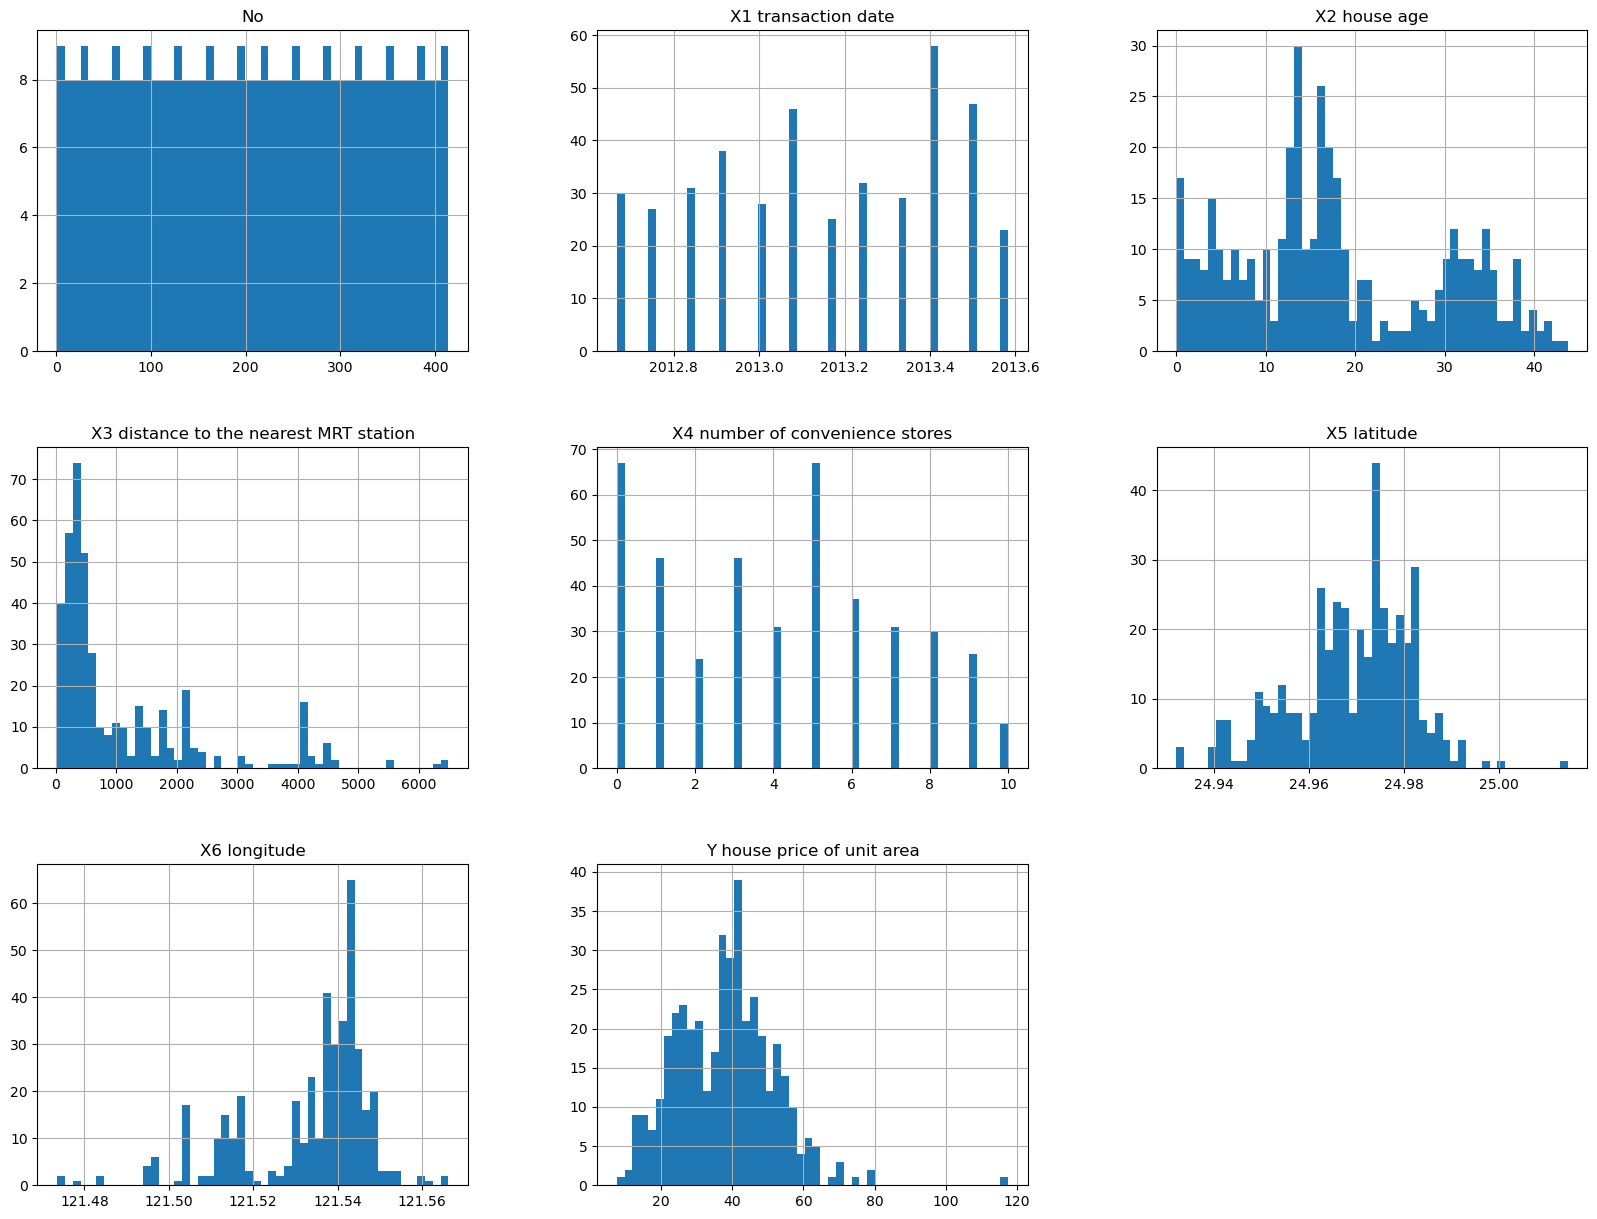

In [512]:
housing.hist(bins=50, figsize=(20, 15))

# Train-Test Splitting

In [513]:
## For learning purpose
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [514]:
# train_set, test_set = split_train_test(housing, 0.2)

In [515]:
# print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}\n")

In [516]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}\n")

Rows in train set:331 
Rows in test set:83



In [517]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['X1 transaction date']):
        strat_train_set=housing.loc[train_index]
        strat_test_set=housing.loc[test_index]                                

In [518]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 170 to 44
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      83 non-null     int64  
 1   X1 transaction date                     83 non-null     float64
 2   X2 house age                            83 non-null     float64
 3   X3 distance to the nearest MRT station  83 non-null     float64
 4   X4 number of convenience stores         83 non-null     int64  
 5   X5 latitude                             83 non-null     float64
 6   X6 longitude                            83 non-null     float64
 7   Y house price of unit area              83 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 5.8 KB


In [519]:
strat_test_set['X1 transaction date'].value_counts()

2013.417    12
2013.083     9
2013.500     9
2012.917     8
2013.333     6
2012.833     6
2013.000     6
2013.250     6
2012.667     6
2012.750     5
2013.167     5
2013.583     5
Name: X1 transaction date, dtype: int64

In [520]:
strat_train_set['X1 transaction date'].value_counts()

2013.417    46
2013.500    38
2013.083    37
2012.917    30
2013.250    26
2012.833    25
2012.667    24
2013.333    23
2013.000    22
2012.750    22
2013.167    20
2013.583    18
Name: X1 transaction date, dtype: int64

In [521]:
# 46/12


In [522]:
# 18/5

In [523]:
housing = strat_train_set.copy()

# Looking for Corelation

In [524]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.545551
X5 latitude                               0.521617
X6 longitude                              0.465676
X1 transaction date                       0.093637
No                                        0.012800
X2 house age                             -0.164624
X3 distance to the nearest MRT station   -0.653192
Name: Y house price of unit area, dtype: float64

In [525]:
from pandas.plotting import scatter_matrix 
attributes=['Y house price of unit area', 'X6 longitude', 'X5 latitude' ]

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X6 longitude', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X6 longitude'>,
        <Axes: xlabel='X6 longitude', ylabel='X6 longitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X6 longitude'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X5 latitude'>,
        <Axes: xlabel='X6 longitude', ylabel='X5 latitude'>,
        <Axes: xlabel='X5 latitude', ylabel='X5 latitude'>]], dtype=object)

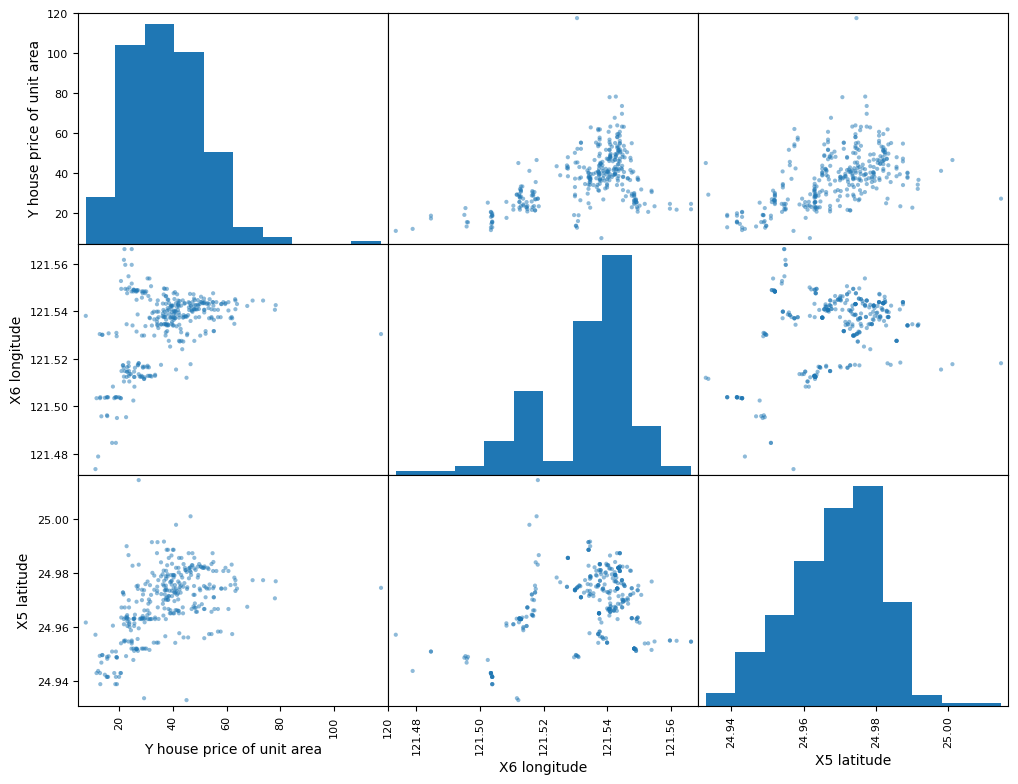

In [526]:
scatter_matrix(housing[attributes], figsize=(12, 9))

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

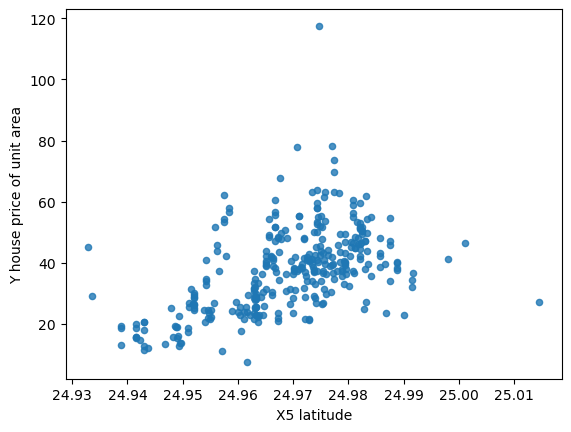

In [527]:
housing.plot(kind='scatter', x='X5 latitude', y='Y house price of unit area', alpha=0.8 )

# Trying to Attribute combination

In [528]:
housing['direction'] = housing['X5 latitude']/housing['X6 longitude']

In [529]:
housing['direction']

24     0.205478
391    0.205272
278    0.205336
67     0.205419
411    0.205523
         ...   
337    0.205425
52     0.205519
71     0.205498
325    0.205440
225    0.205410
Name: direction, Length: 331, dtype: float64

In [530]:
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,direction
24,25,2013.000,39.6,480.6977,4,24.97353,121.53885,38.8,0.205478
391,392,2013.583,6.2,1939.7490,1,24.95155,121.55387,31.3,0.205272
278,279,2012.750,0.0,208.3905,6,24.95618,121.53844,44.0,0.205336
67,68,2013.500,8.5,104.8101,5,24.96674,121.54067,56.8,0.205419
411,412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6,0.205523


In [531]:
corr_matrix = housing.corr()
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.545551
X5 latitude                               0.521617
X6 longitude                              0.465676
direction                                 0.431781
X1 transaction date                       0.093637
No                                        0.012800
X2 house age                             -0.164624
X3 distance to the nearest MRT station   -0.653192
Name: Y house price of unit area, dtype: float64

<Axes: xlabel='direction', ylabel='Y house price of unit area'>

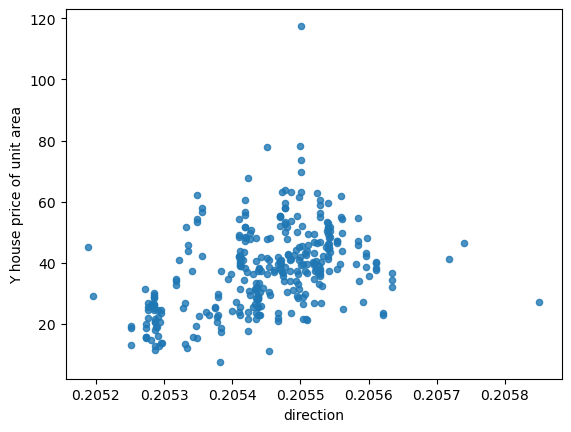

In [532]:
housing.plot(kind='scatter', x='direction', y='Y house price of unit area', alpha=0.8 )

In [533]:
housing = strat_train_set.drop("Y house price of unit area", axis=1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

# Missing Attibutes

In [534]:
# To take care of missing  attributes, we have three opt
#  1. Get rid of the missing data points
#  2. Get rid of the whole attribute
#  3. Set the value to some value(0, mean or median)

In [535]:
a = housing.dropna(subset=['X5 latitude']) #option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(331, 7)

In [536]:
housing.drop('X5 latitude', axis=1).shape #option 2
#note that there is no X5 latitude column
# Note that the original housing dataframe will remain unchanged

(331, 6)

In [537]:
median=housing['X5 latitude'].median() # option 3
# this value is imp during testing time

In [538]:
housing['X5 latitude'].fillna(median)
# Note that the original housing dataframe will remain unchanged

24     24.97353
391    24.95155
278    24.95618
67     24.96674
411    24.97923
         ...   
337    24.96871
52     24.97419
71     24.97563
325    24.97015
225    24.96571
Name: X5 latitude, Length: 331, dtype: float64

In [539]:
housing.shape

(331, 7)

In [540]:
housing.describe() #before we started filling missing attributes

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,207.773414,2013.148305,17.810876,1098.354193,3.921450,24.968961,121.533457
std,121.311495,0.282119,11.426132,1228.384528,2.960322,0.012553,0.015181
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530
25%,100.000000,2012.917000,8.950000,292.997800,1.000000,24.962990,121.527600
50%,205.000000,2013.167000,16.100000,535.527000,4.000000,24.971100,121.537880
75%,317.500000,2013.417000,29.200000,1455.798000,6.000000,24.977705,121.543480
max,414.000000,2013.583000,41.400000,6488.021000,10.000000,25.014590,121.566270


In [541]:
# same thing is available in sklearn using class

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [542]:
imputer.statistics_

array([ 205.     , 2013.167  ,   16.1    ,  535.527  ,    4.     ,
         24.9711 ,  121.53788])

In [543]:
imputer.statistics_.shape

(7,)

In [544]:
x = imputer.transform(housing)

In [545]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [546]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,207.773414,2013.148305,17.810876,1098.354193,3.921450,24.968961,121.533457
std,121.311495,0.282119,11.426132,1228.384528,2.960322,0.012553,0.015181
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530
25%,100.000000,2012.917000,8.950000,292.997800,1.000000,24.962990,121.527600
50%,205.000000,2013.167000,16.100000,535.527000,4.000000,24.971100,121.537880
75%,317.500000,2013.417000,29.200000,1455.798000,6.000000,24.977705,121.543480
max,414.000000,2013.583000,41.400000,6488.021000,10.000000,25.014590,121.566270


# Scikitlearn Design

In [547]:
# Primarily 3 types of obj
#   1. Estimators0- it estimates some parameter based on a datasets eg. imputer it has a fit methodand transform method. fit method - fits the datasets and calculate internal parameters

#    2. Transformers -transform method takes input and return output based on the learning from fit(). It also has a convenience function called fit transform () which fits and then transforms.

#   3. Predictors - LinearRegression model is an eg of predictor. fit()and predict() are 2 common function. It also gives score() function which will evaluate the predictions 

# Feature Scaling

In [548]:
#Primarily, teo types of feature scaling methods:
# 1. min-max scaling(Normalization)
#    (value - min)/(max - min)
#   SKlearn provides a class called MinMaxScaler for this 
# 
# 2.Standardization 
#    (value-mean)/std
#   SKlearn provides a class called Standard Scaler for this

# Creating Pipeline

In [549]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [550]:
my_pipeline = Pipeline([
    ('imputer̥', SimpleImputer(strategy="median")), 
    #...........add as many as you wanna in pipeline
    ('std_scaler', StandardScaler())
])

In [551]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [552]:
housing_num_tr # gives numpy array

array([[-1.50892654, -0.52647856,  1.90984256, ...,  0.02657439,
         0.36450366,  0.3557868 ],
       [ 1.52092352,  1.54315307, -1.01770707, ..., -0.98836307,
        -1.38907548,  1.34665405],
       [ 0.58802691, -1.41397069, -1.56114442, ...,  0.70319937,
        -1.01969097,  0.32873916],
       ...,
       [-1.12090759, -0.23183118,  1.55047269, ..., -0.31173809,
         0.53204307,  0.24363804],
       [ 0.97604585, -0.23183118,  1.646889  , ...,  1.37982434,
         0.094845  ,  0.75754323],
       [ 0.15047363,  0.36101356, -1.46472812, ...,  0.70319937,
        -0.25938118,  0.49036531]])

In [553]:
housing_num_tr.shape

(331, 7)

# Selecting a desired model for Real Estate

In [554]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
 
# model = LinearRegression()
# model1 = DecisionTreeRegressor()
model2 = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


LinearRegression()

In [555]:
some_data =housing.iloc[:5]

In [556]:
some_labels = housing_labels.iloc[:5]

In [557]:
prepared_data = my_pipeline.transform(some_data)

In [558]:
model.predict(prepared_data)

array([35.8958039 , 30.56234421, 43.41947089, 47.53579974, 46.28243691])

In [559]:
list(some_labels)

[38.8, 31.3, 44.0, 56.8, 40.6]

# Evaluating Model


In [561]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
# lin_mse = mean_squared_error(housing_labels, housing_predictions)
# lin_rmse = np.sqrt(lin_mse)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)


In [562]:
# lin_mse
rmse

9.232402877029745

 # Using better Evaluation Technique - Cross Validation
 

In [563]:
#1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores =cross_val_score(model, housing_tr, housing_labels, scoring="neg_mean_squared_error", cv=10 )
rmse_scores = np.sqrt(-scores)

In [564]:
rmse_scores

array([15.49333487, 10.24747663, 10.46708079,  6.58269923,  5.72845911,
        7.48311807,  8.97893301,  9.69098842,  7.8125333 ,  8.43476559])

In [565]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation: ", scores.std())    

In [566]:
print_scores(rmse_scores)

scores: [15.49333487 10.24747663 10.46708079  6.58269923  5.72845911  7.48311807
  8.97893301  9.69098842  7.8125333   8.43476559]
mean: 9.09193890019931
standard deviation:  2.585384373370673


# Saving the Model


from joblib import dump, load
dump(model, "Real_Estate.joblib")

# Testing the Model

In [570]:
X_test = strat_test_set.drop("Y house price of unit area", axis =1)
Y_test = strat_test_set["Y house price of unit area"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
# print(final_prediction, list(Y_test))

[12.45187979 38.06988549 41.03055976  5.80937001 40.5367514  42.21149797
 44.60089657 43.99145427 40.07157544 41.37322101 39.32652549 47.07240531
 53.28150417 50.57872856 46.86976877 31.23441659 41.4177004  16.85728558
 46.18291749 42.7008715  46.96058432 43.11834665 47.66580648 38.39664995
 46.64993386 53.00979953  9.25985826 42.53787625 43.51724667 51.1407341
 44.27266826 46.9351197  44.01859995 37.37888299 50.26859676 31.28305049
 51.78763883 32.41173255 45.71077812 46.20809794 35.97080952 47.95296245
 11.55013448 44.21882332 30.26915382 49.13547596 45.66949701 40.83961529
 44.19378432 54.20974737 47.27291282 43.32544326 44.70335721 50.4363225
 47.89612793 14.72095135 46.78197917 43.79259749 34.34629822 13.06207351
 45.03789676 24.8381971  13.18299846 38.56894614 37.85724733 47.83764404
 34.40878248 44.19670842 43.07272042 39.49612025 40.89621325 30.48562491
 40.11384425 15.62299221 13.42759435 45.44395742 27.99677155 45.49776088
 37.2014276  39.53415253 42.13546856 42.39728024 47.4

In [572]:
final_rmse

6.743453163702843

In [573]:
prepared_data[0]

array([-1.50892654, -0.52647856,  1.90984256, -0.50358142,  0.02657439,
        0.36450366,  0.3557868 ])

# Using the Model

In [577]:
from joblib import dump,load
import numpy as np
model=load("Real_Estate.joblib")

features= np.array([[-11.546927854, -0.52647856,  9.90984256, -0.50358142,  0.02657439,
        0.36450366,  0.3557868 ]])
model.predict(features)

array([16.37572726])